# 聚类——KMeans, Hierarchical clustering, 
---

# KMeans

In [1]:
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt

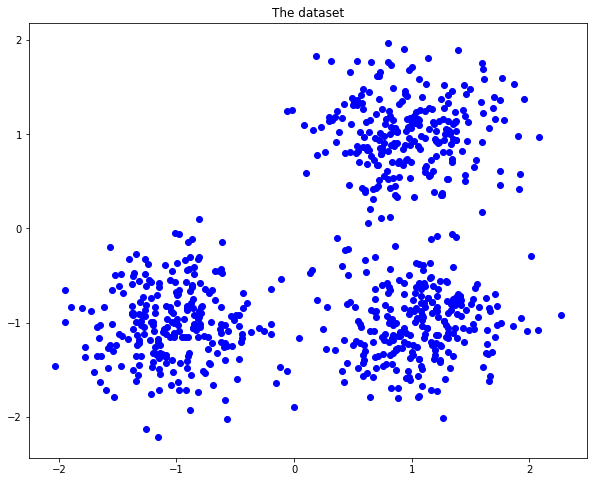

In [2]:
centers = [[1, 1], [-1, -1], [1, -1]]    # 定义 3 个中心点
# 生成 n=750 个样本，每个样本的特征个数为 d=2，并返回每个样本的真实类别
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4, random_state=0)
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c='b')
plt.title('The dataset')
plt.show()

## k=2聚类

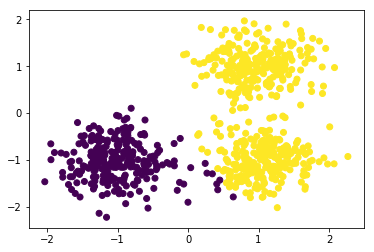

In [3]:
from sklearn.cluster import KMeans
y_pred = KMeans(n_clusters=2, random_state=9).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.show()

## 用Calinski-Harabasz Index评估的聚类分数(越高越好):

不像监督学习的分类问题和回归问题，我们的无监督聚类没有labels输出，也就没有比较直接的聚类评估方法。但是我们可以从簇内的稠密程度和簇间的离散程度来评估聚类的效果。常见的方法有轮廓系数Silhouette Coefficient和Calinski-Harabasz Index。个人比较喜欢Calinski-Harabasz Index，这个计算简单直接，得到的Calinski-Harabasz分数值s越大则聚类效果越好。

Calinski-Harabasz分数值s的数学计算公式是：
$$S(K) = \frac{tr(B_k)}{tr(W_k)}\frac{m-k}{k-1}$$

其中m为训练集样本数，k为类别数。Bk为类别之间的协方差矩阵，Wk为类别内部数据的协方差矩阵。tr为矩阵的迹。
也就是说，类别内部数据的协方差越小越好，类别之间的协方差越大越好，这样的Calinski-Harabasz分数会高。在scikit-learn中， Calinski-Harabasz Index对应的方法是metrics.calinski_harabaz_score.

In [4]:
from sklearn import metrics
metrics.calinski_harabaz_score(X, y_pred)  

891.68336475691933

## k=3聚类

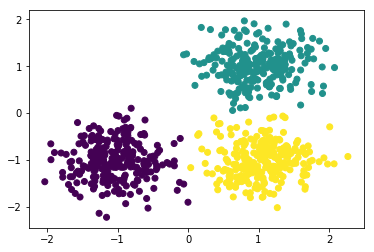

In [5]:
from sklearn.cluster import KMeans
y_pred = KMeans(n_clusters=3, random_state=9).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.show()

In [6]:
metrics.calinski_harabaz_score(X, y_pred)

2264.5251637391507

可见此时k=3的聚类分数比k=2还差。

1. 可见k=4的聚类分数比k=2和k=3都要高，这也符合预期，因为随机数据集也就是4个簇。
2. 当特征维度大于2，我们无法直接可视化聚类效果来肉眼观察时，用Calinski-Harabaz Index评估是一个很实用的方法。

---

# 实现KMeans

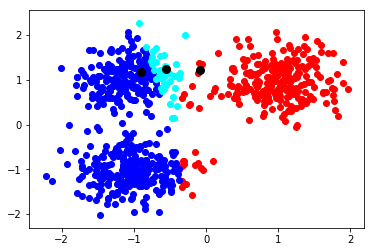

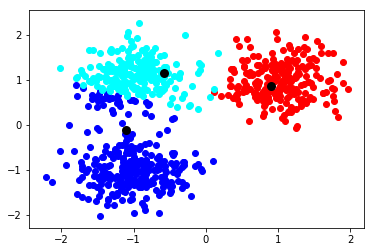

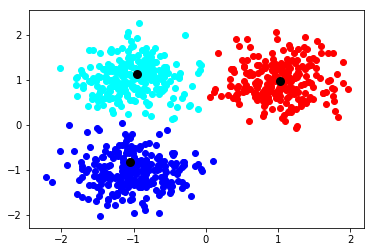

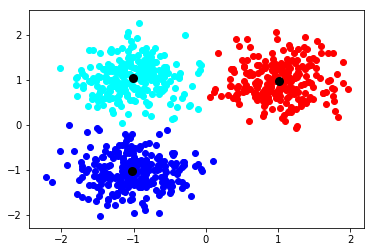

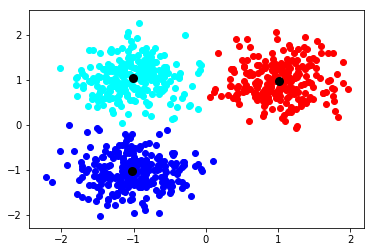

In [7]:
import numpy as np
import matplotlib.pyplot as plt


def kmeans(data, cluster_num, method='mean'):
    points = np.array(data)
    labels = []
    random_idx = []
    while True:
        t = np.random.randint(points.shape[0])
        if t not in random_idx:
            random_idx.append(t)
        if len(random_idx) == cluster_num:
            break

    seeds = []
    for i in range(cluster_num):
        seeds.append(points[random_idx[i]])
    seeds = np.array(seeds)
    prev_seeds = seeds + 10
    colors = ["red", "blue","cyan", "yellow", "purple"]
    points_labeled = []
    for i in range(cluster_num):
        points_labeled.append([])

    while sum(abs((prev_seeds - seeds).ravel())) > 0:
        prev_seeds = seeds.copy()
        for i in range(points.shape[0]):
            t_min = 10000
            for j in range(seeds.shape[0]):
                t_current = np.sqrt((points[i][0] - seeds[j][0]) ** 2 + (points[i][1] - seeds[j][1]) ** 2)
                if t_current < t_min:
                    t_min = t_current
                    try:
                        labels.pop(i)
                    except IndexError:
                        pass
                    labels.append(j)
        for i in range(len(labels)):
            points_labeled[labels[i]].append(points[i].tolist())
        points_labeled = np.array(points_labeled)
        for i in range(points_labeled.shape[0]):
            if points_labeled[i]:
                plt.scatter(np.array(points_labeled[i])[:, 1], np.array(points_labeled[i])[:, 0], c=colors[i])
        for i in seeds:
            plt.scatter(i[1], i[0], c="black", linewidths=3)
        plt.show()
        for i in range(seeds.shape[0]):
            if method == 'mean':
                seeds[i] = np.array(
                    [np.mean(np.array(points_labeled[i])[:, 0]), np.mean(np.array(points_labeled[i])[:, 1])])
            elif method == 'median':
                seeds[i] = np.array(
                    [np.median(np.array(points_labeled[i])[:, 0]), np.median(np.array(points_labeled[i])[:, 1])])
        points_labeled = []
        for i in range(cluster_num):
            points_labeled.append([])
        labels = []

    return seeds, labels, sum(abs((prev_seeds - seeds).ravel()))

points = X
cluster_num = 3
[centroids, labels, interia] = kmeans(points, cluster_num)

---

# 层次聚类

## 导入scipy.cluster.hierarchy

In [8]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np

%matplotlib inline
np.set_printoptions(precision=5, suppress=True)

## 可视化实验样本

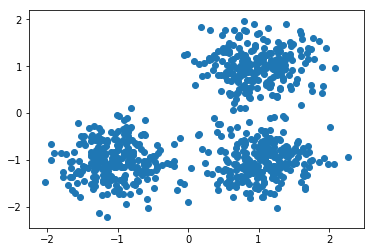

In [9]:
np.random.seed(1029)
plt.figure(figsize=(6, 4))
plt.scatter(X[:, 0], X[:, 1])
plt.show()

## 进行层次聚类

In [10]:
# 建立集群关系数组
Z = linkage(X, 'ward')

聚类结束。很简单吧 :smile:。不用惊讶，毕竟这是 Python 嘛。

在这一行代码中，根据 SciPy 的 linkage 模块文档所述，`ward` 是一种用于计算集群之间距离的方法。`ward` 表明 linkage() 方法会使用离差平方和算法。

使用 `ward` 是一个不错的选择。当然还有其他通用的距离算法，例如 `single`，`complete`，`average`。如果你了解这些算法，那么你可以选择使用这些方法进行层次聚类。

你可以使用 cophenet() 计算同表象相关系数来判断集群的性能。这个方程非常简单的比对了所有实验样本之间的距离和聚类之后的样本距离。如果这个值越接近于1，集群结果就更加完整的保存了实验样本间的实际距离。在我们的实验中，这个值非常接近于1：

In [11]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

c, coph_dists = cophenet(Z, pdist(X))
print c

0.835958216514


## 建立树状图

现在可以看到集群在最后p=20次合并中所包含的数据点数量。

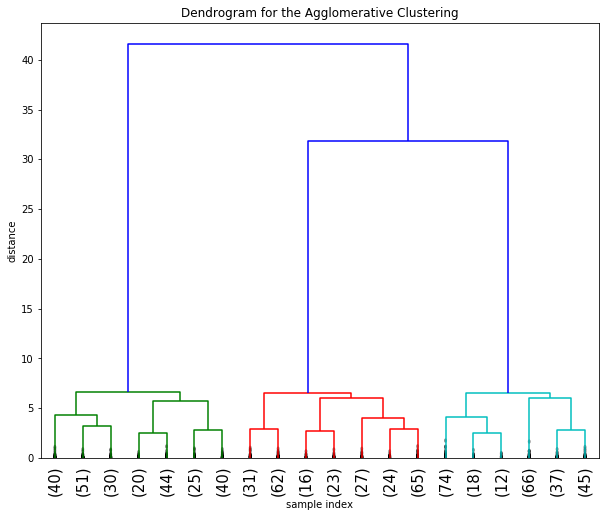

In [12]:
plt.figure(figsize=(10, 8))
dendrogram(Z, truncate_mode='lastp', p=20, show_leaf_counts=True, leaf_rotation=90, leaf_font_size=15, show_contracted=True)
plt.title('Dendrogram for the Agglomerative Clustering')
plt.xlabel('sample index')
plt.ylabel('distance')
plt.show()

可以看到，该树形图的最后两次合并相比之前合并过程的合并距离要大得多，由此可以说明最后两次合并是不合理的；因而对于本数据集，该算法可以很好地区分出 3 个 cluster（和实际相符），分别在上图中由三种颜色所表示。

## 更好看的树状图

可以在树状图中显示集群间距离让树状图变得更加直观：

In [13]:
def fancy_dendrogram(*args, **kwargs):
	max_d = kwargs.pop('max_d', None)
	if max_d and 'color_threshold' not in kwargs:
		kwargs['color_threshold'] = max_d
	annotate_above = kwargs.pop('annotate_above', 0)

	ddata = dendrogram(*args, **kwargs)

	if not kwargs.get('no_plot', False):
		plt.title('Hierarchical Clustering Dendrogram (truncated)')
		plt.xlabel('sample index or (cluster size)')
		plt.ylabel('distance')
		for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
			x = 0.5 * sum(i[1:3])
			y = d[1]
			if y > annotate_above:
				plt.plot(x, y, 'o', c=c)
				plt.annotate("%.3g" % y, (x, y), xytext=(0, -5), textcoords='offset points', va='top', ha='center')
		if max_d:
			plt.axhline(y=max_d, c='k')
	return ddata

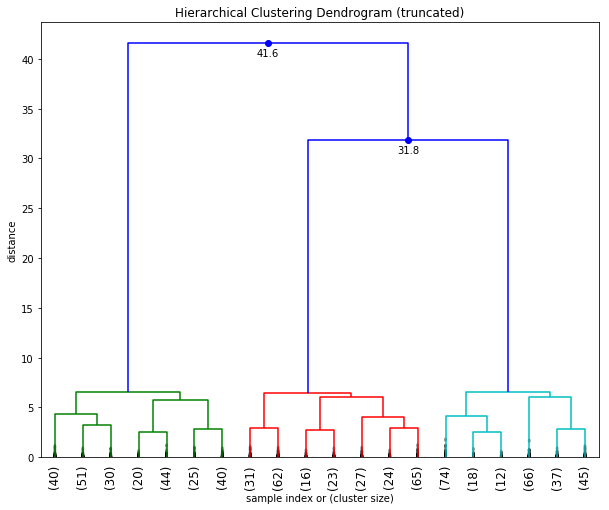

In [14]:
plt.figure(figsize=(10, 8))
fancy_dendrogram(Z, truncate_mode='lastp', p=20, leaf_rotation=90., leaf_font_size=12., show_contracted=True, annotate_above=10)
plt.show()

## 选择临界距离决定集群数量

就像之前解释的那样，大距离跨度通常是感兴趣的地方。把距离临界值设为15，因为在这里距离跨度非常明显：

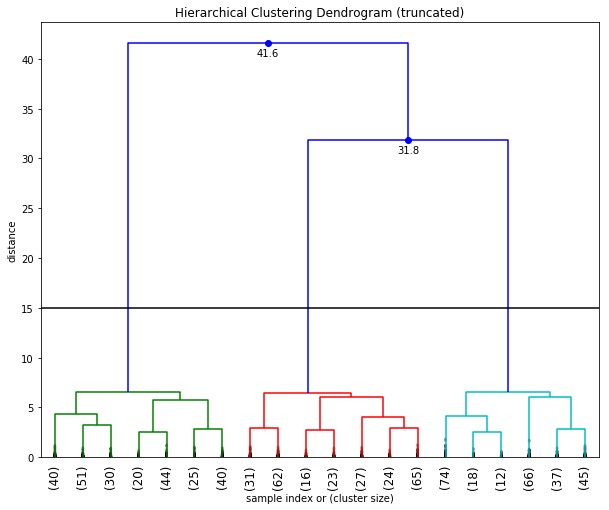

In [15]:
plt.figure(figsize=(10, 8))
max_d = 15
fancy_dendrogram(Z, truncate_mode='lastp', p=20, leaf_rotation=90., leaf_font_size=12., show_contracted=True, annotate_above=10, max_d=max_d)
plt.show()

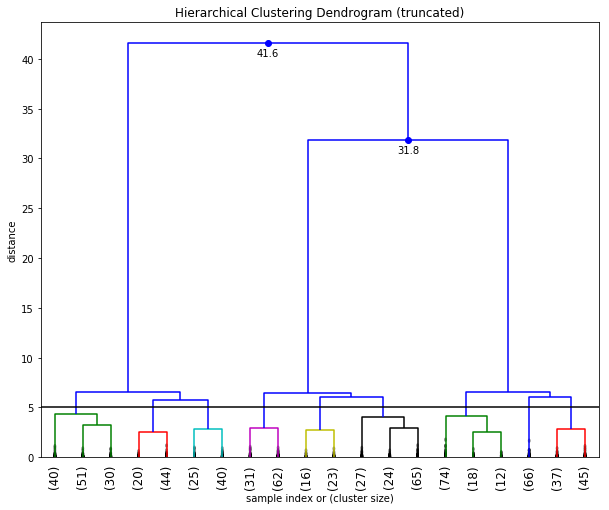

In [16]:
plt.figure(figsize=(10, 8))
max_d = 5
fancy_dendrogram(Z, truncate_mode='lastp', p=20, leaf_rotation=90., leaf_font_size=12., show_contracted=True, annotate_above=10, max_d=max_d)
plt.show()

当临界值为5的时候，有9个集群。

## 获取聚类结果

在得到了层次聚类的过程信息 Z 后，我们可以使用 fcluster 函数来获取聚类结果。可以从两个维度来得到距离的结果，一个是指定临界距离 d，得到在该距离以下的未合并的所有 cluster 作为聚类结果；另一个是指定 cluster 的数量 k，函数会返回最后的 k 个 cluster 作为聚类结果。使用哪个维度由参数 criterion 决定，对应的临界距离或聚类的数量则由参数 t 所记录。fcluster 函数的结果为一个一维数组，记录每个样本的类别信息。

### 根据临界距离返回聚类结果

In [17]:
d = 15
labels_1 = fcluster(Z, t=d, criterion='distance')
print(labels_1[: 100])    # 打印聚类结果

[2 1 2 3 2 1 1 3 2 2 1 1 1 3 1 2 1 1 3 3 3 3 3 3 1 1 3 2 2 3 2 1 1 2 1 2 3
 2 2 3 3 1 1 1 1 1 2 3 2 1 3 3 1 1 3 3 1 2 3 1 3 3 3 3 3 2 3 3 2 2 2 3 2 2
 3 1 2 1 2 3 1 1 2 2 2 2 1 3 1 3 3 2 1 2 1 2 1 1 2 2]


In [18]:
print(len(set(labels_1)))   # 看看在该临界距离下有几个 cluster

3


### 根据聚类数目返回聚类结果

In [19]:
k = 3
labels_2 = fcluster(Z, t=k, criterion='maxclust')
print(labels_2[: 100])  

[2 1 2 3 2 1 1 3 2 2 1 1 1 3 1 2 1 1 3 3 3 3 3 3 1 1 3 2 2 3 2 1 1 2 1 2 3
 2 2 3 3 1 1 1 1 1 2 3 2 1 3 3 1 1 3 3 1 2 3 1 3 3 3 3 3 2 3 3 2 2 2 3 2 2
 3 1 2 1 2 3 1 1 2 2 2 2 1 3 1 3 3 2 1 2 1 2 1 1 2 2]


### 看看两种不同维度下得到的聚类结果是否一致

In [20]:
list(labels_1) == list(labels_2)

True

## 将聚类结果可视化

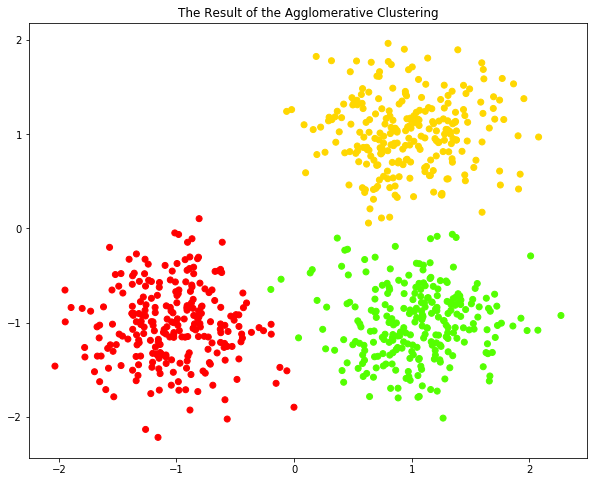

In [21]:
plt.figure(figsize=(10, 8))
plt.title('The Result of the Agglomerative Clustering')
plt.scatter(X[:, 0], X[:, 1], c=labels_2, cmap='prism')
plt.show()

### 比较不同方法下的聚类结果

最后，我们对同一份样本集进行了 cluster 间距离衡量准则分别为 Single-link、Complete-link、UPGMA（Average）和 Ward 的 Agglomerative 层次聚类，取聚类数目为 3，程序如下：

method single:
Adjust mutual information: 0.001
time used: 0.012 seconds
method complete:
Adjust mutual information: 0.838
time used: 0.011 seconds
method average:
Adjust mutual information: 0.945
time used: 0.010 seconds
method ward:
Adjust mutual information: 0.956
time used: 0.012 seconds


<Figure size 720x576 with 0 Axes>

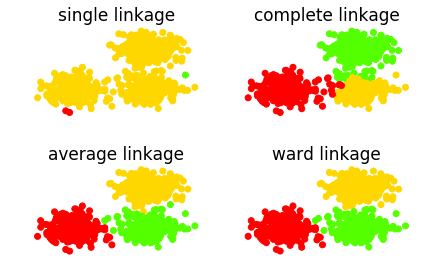

In [25]:
from time import time
import numpy as np
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.datasets.samples_generator import make_blobs
from sklearn.metrics.cluster import adjusted_mutual_info_score
import matplotlib.pyplot as plt
# 生成样本点
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels = make_blobs(n_samples=750, centers=centers,
                        cluster_std=0.4, random_state=0)
# 可视化聚类结果
def plot_clustering(X, labels, title=None):
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='prism')
    if title is not None:
        plt.title(title, size=17)
    plt.axis('off')
    plt.tight_layout()
# 进行 Agglomerative 层次聚类
linkage_method_list = ['single', 'complete', 'average', 'ward']
plt.figure(figsize=(10, 8))
ncols, nrows = 2, int(np.ceil(len(linkage_method_list) / 2))
plt.subplots(nrows=nrows, ncols=ncols)
for i, linkage_method in enumerate(linkage_method_list):
    print('method %s:' % linkage_method)
    start_time = time()
    Z = linkage(X, method=linkage_method)
    labels_pred = fcluster(Z, t=3, criterion='maxclust')
    print('Adjust mutual information: %.3f' %
            adjusted_mutual_info_score(labels, labels_pred))
    print('time used: %.3f seconds' % (time() - start_time))
    plt.subplot(nrows, ncols, i + 1)
    plot_clustering(X, labels_pred, '%s linkage' % linkage_method)
plt.show()

在上面的过程中，我们还为每一种聚类产生的结果计算了一个用于评估聚类结果与样本的真实类之间的相近程度的 AMI()（Adjust Mutual Information）量，该量越接近于 1 则说明聚类算法产生的类越接近于真实情况。程序的打印结果如上。

从上面的图和 AMI 量的表现来看，Single-link 方法下的层次聚类结果最差，它几乎将所有的点都聚为一个 cluster，而其他两个 cluster 则都仅包含个别稍微有点偏离中心的样本点，这充分体现了 Single-link 方法下的“链式效应”，也体现了 Agglomerative 算法的一个特点，即“赢者通吃”（rich getting richer）： Agglomerative 算法倾向于聚出不均匀的类，尺寸大的类倾向于变得更大，对于 Single-link 和 UPGMA（Average） 方法尤其如此。由于本次实验的样本集较为理想，因此除了 Single-link 之外的其他方法都表现地还可以，但当样本集变复杂时，上述“赢者通吃” 的特点会显现出来。

